# Classical Time Series Modeling

## Moving Average

Moving average is one of the most basic time series models. Moving average, MA for short, is nothing but calculating average of the dataset over time in a rolling manner. It  has different types of moving average models such as simple moving average (SMA), cumulative moving average (CMA), and Exponential Moving Average (EMA).

In this Liveproject, I will model my data with SMA and EMA. But first, let's apply train-test split.

In [1]:
# This code imports the data you generated before for replicating.
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

stock_prices = pd.read_csv('stock_prices.csv')
stock_prices = stock_prices.set_index('timestamp')
diff_VZ = pd.read_csv('diff_VZ.csv')
diff_VZ = diff_VZ.set_index('timestamp')
diff_T = pd.read_csv('diff_T.csv')
diff_T = diff_T.set_index('timestamp')

In [2]:
split = int(len(diff_VZ.values)*0.95)
diff_train_T = diff_T.iloc[:split]
diff_test_T = diff_T.iloc[split:]
diff_train_VZ = diff_VZ.iloc[:split]
diff_test_VZ = diff_VZ.iloc[split:]

In [3]:
short_moving_average_T = diff_T.rolling(window=4).mean()
long_moving_average_T = diff_T.rolling(window=13).mean()

In [4]:
short_moving_average_VZ = diff_VZ.rolling(window=4).mean()
long_moving_average_VZ = diff_VZ.rolling(window=10).mean()

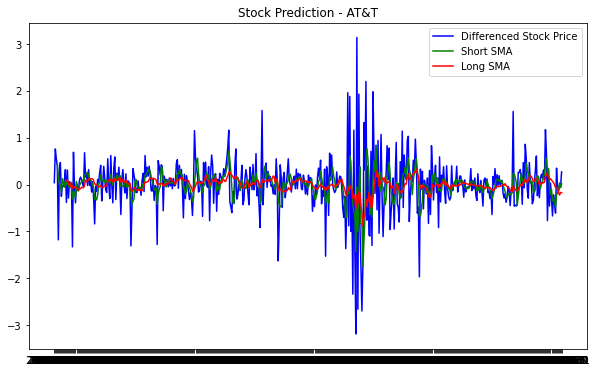

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(diff_T.index, diff_T, label='Differenced Stock Price',c='b')
ax.plot(short_moving_average_T.index, short_moving_average_T, label = 'Short SMA',c='g')
ax.plot(long_moving_average_T.index, long_moving_average_T, label = 'Long SMA',c='r')
ax.legend(loc='best')
ax.set_title('Stock Prediction - AT&T')
plt.show()

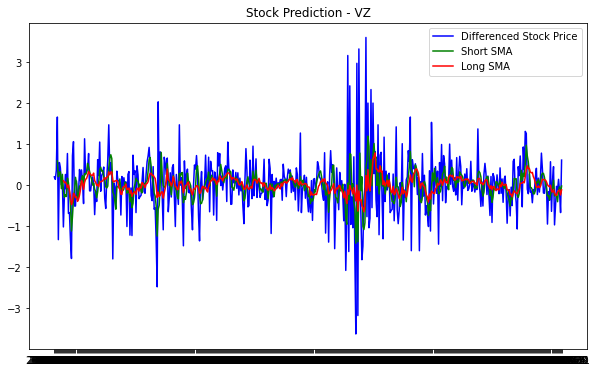

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(diff_VZ.index, diff_VZ, label='Differenced Stock Price',c='b')
ax.plot(short_moving_average_VZ.index, short_moving_average_VZ, label = 'Short SMA',c='g')
ax.plot(long_moving_average_VZ.index, long_moving_average_VZ, label = 'Long SMA',c='r')
ax.legend(loc='best')
ax.set_title('Stock Prediction - VZ')
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
def rmse(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [9]:
short_moving_average_T.dropna(inplace=True)

In [10]:
print('RMSE of AT&T for Short SMA {:.4f}'\
      .format(rmse(diff_T.iloc[3:],short_moving_average_T.dropna())))

RMSE of AT&T for Short SMA 0.5052


In [11]:
long_moving_average_T.dropna(inplace=True)

In [12]:
print('RMSE of AT&T for Long SMA {:.4f}'\
      .format(rmse(diff_T.iloc[12:],long_moving_average_T)))

RMSE of AT&T for Long SMA 0.5523


In [13]:
short_moving_average_VZ.dropna(inplace=True)

In [14]:
print('RMSE of VZ for Short SMA {:.4f}'\
      .format(rmse(diff_VZ.iloc[3:],short_moving_average_VZ)))

RMSE of VZ for Short SMA 0.6447


In [15]:
long_moving_average_VZ.dropna(inplace=True)

In [16]:
print('RMSE of VZ for Long SMA {:.4f}'\
      .format(rmse(diff_VZ.iloc[9:],long_moving_average_VZ)))

RMSE of VZ for Long SMA 0.6844


## Exponential Moving Average

In [17]:
short_exp_moving_average_T = diff_T.ewm(span=4,adjust=False).mean()
long_exp_moving_average_T = diff_T.ewm(span=13,adjust=False).mean()

In [18]:
short_exp_moving_average_VZ = diff_VZ.ewm(span=4,adjust=False).mean()
long_exp_moving_average_VZ = diff_VZ.ewm(span=10,adjust=False).mean()

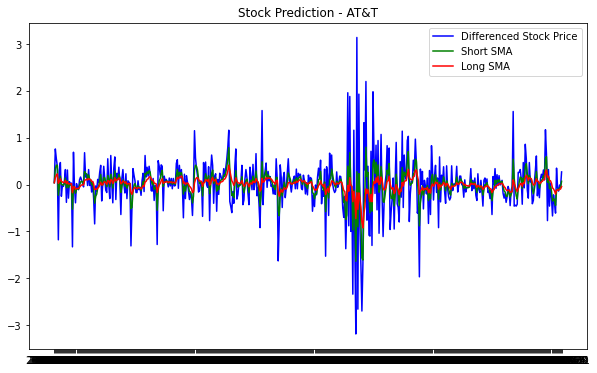

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(diff_T.index, diff_T, label='Differenced Stock Price',c='b')
ax.plot(short_exp_moving_average_T.index, short_exp_moving_average_T, label = 'Short SMA',c='g')
ax.plot(long_exp_moving_average_T.index, long_exp_moving_average_T, label = 'Long SMA',c='r')
ax.legend(loc='best')
ax.set_title('Stock Prediction - AT&T')
plt.show()

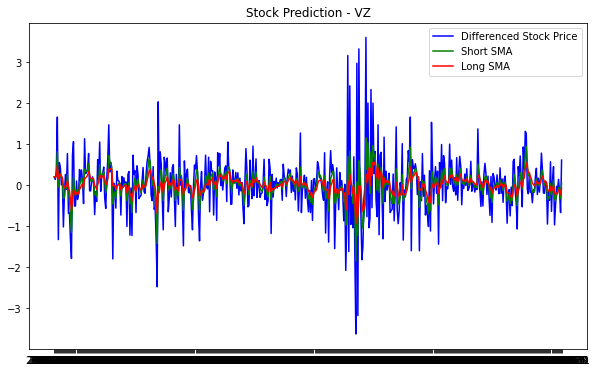

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(diff_VZ.index, diff_VZ, label='Differenced Stock Price',c='b')
ax.plot(short_exp_moving_average_VZ.index, short_exp_moving_average_VZ, label = 'Short SMA',c='g')
ax.plot(long_exp_moving_average_VZ.index, long_exp_moving_average_VZ, label = 'Long SMA',c='r')
ax.legend(loc='best')
ax.set_title('Stock Prediction - VZ')
plt.show()

In [21]:
short_exp_moving_average_T.dropna(inplace=True)
long_exp_moving_average_T.dropna(inplace=True)
short_exp_moving_average_VZ.dropna(inplace=True)
long_exp_moving_average_VZ.dropna(inplace=True)

In [22]:
print('RMSE of AT&T for Short EWM {:.4f}'\
      .format(rmse(diff_T,short_exp_moving_average_T)))

RMSE of AT&T for Short EWM 0.3965


In [23]:
print('RMSE of AT&T for Long EWM {:.4f}'\
      .format(rmse(diff_T,long_exp_moving_average_T)))

RMSE of AT&T for Long EWM 0.5169


In [24]:
print('RMSE of VZ for Short EWM {:.4f}'\
      .format(rmse(diff_VZ,short_exp_moving_average_VZ)))

RMSE of VZ for Short EWM 0.5089


In [25]:
print('RMSE of AT&T for Long EWM {:.4f}'\
      .format(rmse(diff_VZ,long_exp_moving_average_VZ)))

RMSE of AT&T for Long EWM 0.6395


In all cases, it is quite obvious that the exponential moving average model outperforms the simple moving average in terms of RMSE metric. The reason of this superiority is about giving higher weight to recent observations in exponential moving average model. Whereas, all observations are equally weighted in simple moving average model.

## Autoregressive Model

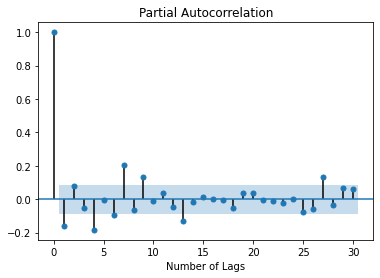

In [26]:
sm.graphics.tsa.plot_pacf(diff_T,lags=30)
plt.xlabel('Number of Lags')
plt.show()

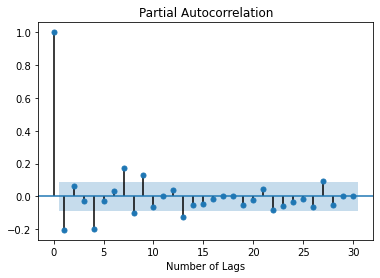

In [27]:
sm.graphics.tsa.plot_pacf(diff_VZ,lags=30)
plt.xlabel('Number of Lags')
plt.show()

In [28]:
from statsmodels.tsa.ar_model import AutoReg

In [29]:
ar_T = AutoReg(diff_train_T, lags=7)
ar_fitted_T = ar_T.fit()

In [30]:
ar_predictions_T = ar_fitted_T.predict(start=len(diff_train_T), 
                                       end=len(diff_train_T)+len(diff_test_T)-1,dynamic=False)

In [31]:
ar_predictions_T = pd.DataFrame(ar_predictions_T)
ar_predictions_T.index = diff_test_T.index

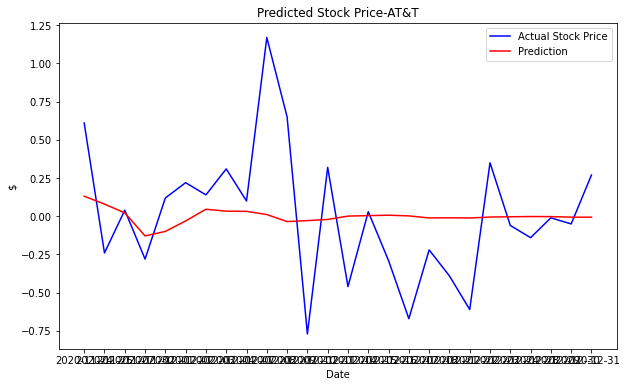

In [32]:
plt.figure(figsize=(10,6))
plt.plot(diff_test_T, label='Actual Stock Price', c='b')
plt.plot(ar_predictions_T, c='r', label='Prediction')
plt.title('Predicted Stock Price-AT&T')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend()
plt.show()

In [33]:
print('RMSE of AT&T for AR model {:.4f}'\
      .format(rmse(diff_test_T,ar_predictions_T)))

RMSE of AT&T for AR model 0.4188


In [34]:
ar_VZ = AutoReg(diff_train_VZ,lags=9)
ar_fitted_VZ = ar_VZ.fit()

In [35]:
ar_predictions_VZ = ar_fitted_VZ.predict(start=len(diff_train_VZ), 
                                         end=len(diff_train_VZ)+len(diff_test_VZ)-1,
                                         dynamic=False)

In [36]:
ar_predictions_VZ=pd.DataFrame(ar_predictions_VZ)
ar_predictions_VZ.index=diff_test_VZ.index

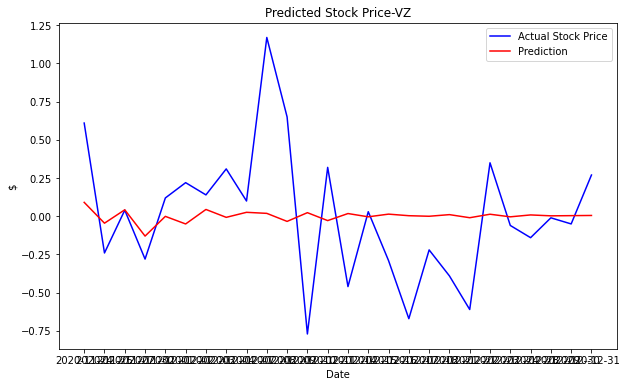

In [37]:
plt.figure(figsize=(10,6))
plt.plot(diff_test_T[-split:], label='Actual Stock Price', c='b')
plt.plot(ar_predictions_VZ, c='r', label='Prediction')
plt.title('Predicted Stock Price-VZ')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend()
plt.show()

In [38]:
print('RMSE of AT&T for AR model {:.4f}'\
      .format(rmse(diff_test_VZ,ar_predictions_VZ)))

RMSE of AT&T for AR model 0.4492


## ARIMA Model

In [39]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
split = int(len(stock_prices['VZ'])*0.95)
train_T = stock_prices['T'].iloc[:split]
test_T = stock_prices['T'].iloc[split:]
train_VZ = stock_prices['VZ'].iloc[:split]
test_VZ = stock_prices['VZ'].iloc[split:]

In [41]:
arima_T = ARIMA(train_T,order=(7,1,7))
arima_fitted_T = arima_T.fit()

In [42]:
arima_VZ = ARIMA(train_VZ,order=(7,1,4))
arima_fitted_VZ= arima_VZ.fit()

In [43]:
arima_predictions_T = arima_fitted_T.predict(start=len(train_T), 
                                   end=len(train_T)+len(test_T)-1,dynamic=False)
arima_predictions_VZ = arima_fitted_VZ.predict(start=len(train_VZ), 
                                   end=len(train_VZ)+len(test_VZ)-1,dynamic=False)

In [44]:
arima_predictions_T=pd.DataFrame(arima_predictions_T)
arima_predictions_T.index=diff_test_T.index
arima_predictions_VZ=pd.DataFrame(arima_predictions_VZ)
arima_predictions_VZ.index=diff_test_VZ.index

In [45]:
arima_predictions_T.to_csv('arima_predictions_T.csv')
arima_predictions_VZ.to_csv('arima_predictions_VZ.csv')

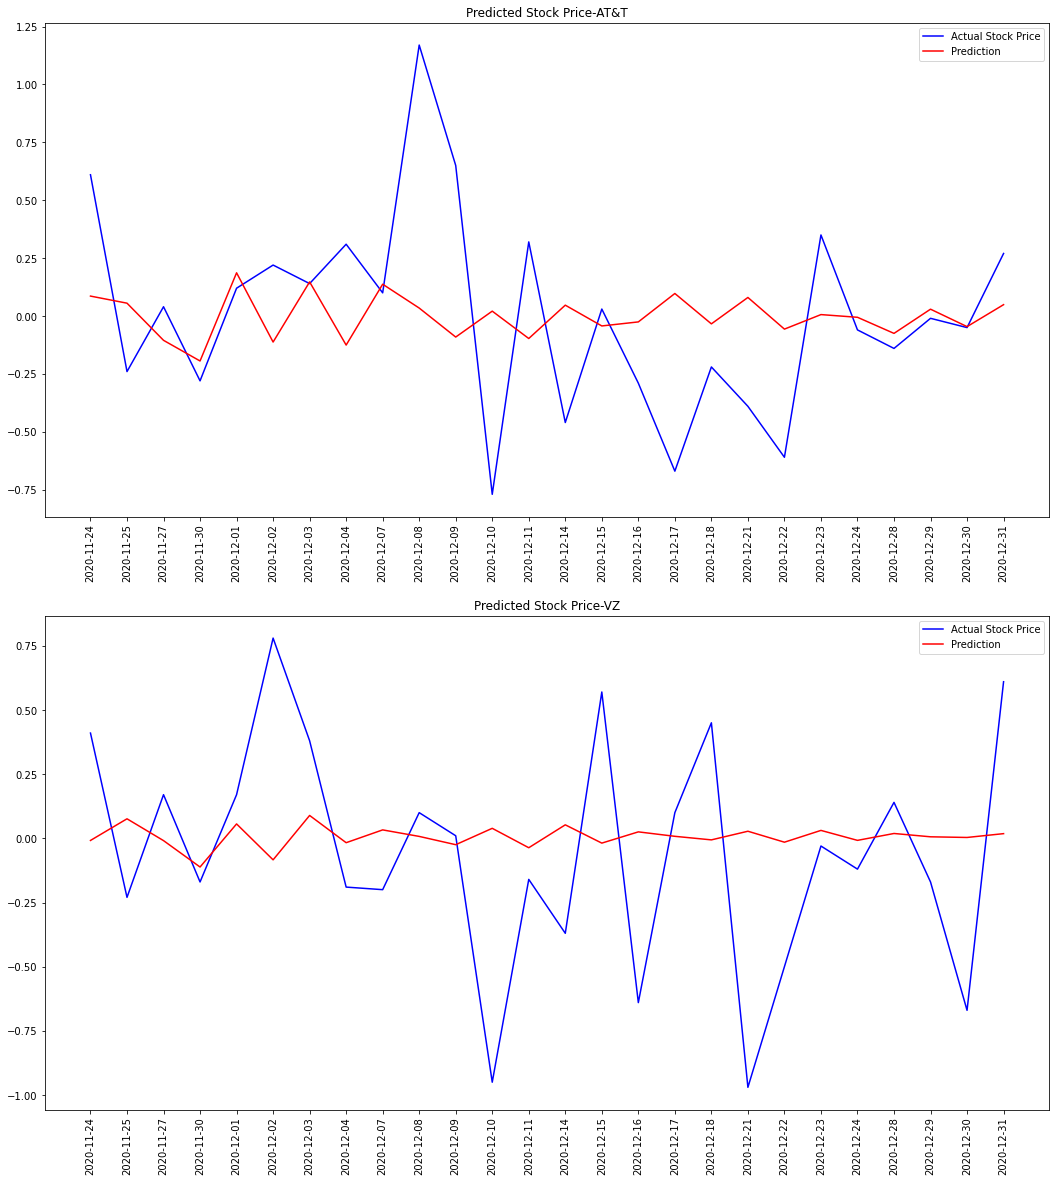

In [46]:
fig, ax = plt.subplots(2,1, figsize=(18,20))
 
ax[0].plot(diff_test_T, label='Actual Stock Price',c='b')
ax[0].plot(arima_predictions_T,c='r',label="Prediction")
ax[0].set_title('Predicted Stock Price-AT&T')
ax[0].xaxis.set_tick_params(rotation=90)
ax[0].legend(loc='best')
ax[1].plot(diff_test_VZ, label='Actual Stock Price',c='b')
ax[1].plot(arima_predictions_VZ,c='r',label="Prediction")
ax[1].set_title('Predicted Stock Price-VZ')
ax[1].legend(loc='best')
ax[1].xaxis.set_tick_params(rotation=90)
plt.show()

In [47]:
print('RMSE of AT&T for ARIMA model {:.4f}'\
      .format(rmse(diff_test_T,arima_predictions_T)))

RMSE of AT&T for ARIMA model 0.4382


In [48]:
print('RMSE of VZ for ARIMA model {:.4f}'\
      .format(rmse(diff_test_VZ,arima_predictions_VZ)))

RMSE of VZ for ARIMA model 0.4606
